In [12]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Directory where the data has been downloaded
data_dir = "/home/student/workspace/lp-forecasting-bm/data"

data = pd.read_csv(data_dir + "/H1.csv")
# How to concatenate columns: https://datatofish.com/concatenate-values-python/
data["Date (Year and Week Number"] = data["ArrivalDateYear"].map(str) + data["ArrivalDateWeekNumber"].map(str)

# Filter out the cancelled bookings
cancelled_bookings_filter = data["IsCanceled"] == 1
cancelled_bookings = data[cancelled_bookings_filter]

cancelled_by_year_and_week = cancelled_bookings.filter(items=["Date (Year and Week Number", "IsCanceled"]).groupby(
    "Date (Year and Week Number")



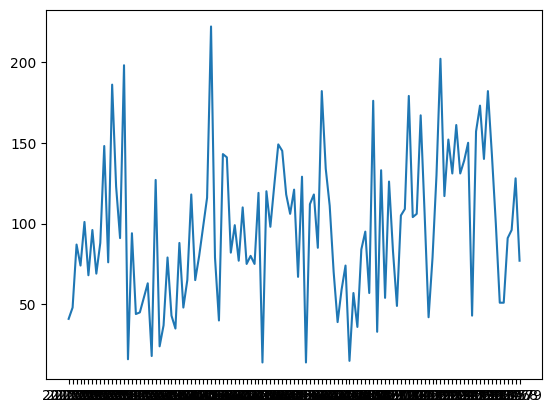

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

# cancelled_by_year_and_week.size()
# cancelled_by_year_and_week.value_counts()

# cancelled_by_year_and_week.head()

cancelled_time_series = cancelled_by_year_and_week.agg("sum")

cancelled_data = cancelled_time_series["IsCanceled"]

pyplot.plot(cancelled_data)



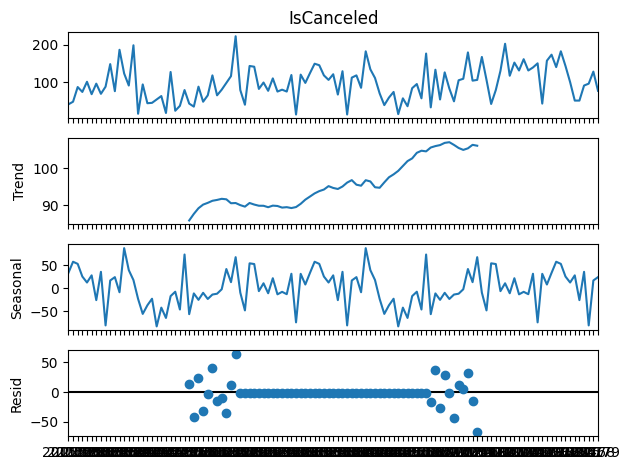

In [21]:
# https://www.kaggle.com/code/chanakyavivekkapoor/decomposing-time-series-data
# https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
decomposition = seasonal_decompose(cancelled_data, model = "additive", period=52)
residual = decomposition.resid
trend = decomposition.trend
seasonal = decomposition.seasonal

decomposition.plot()
pyplot.show()


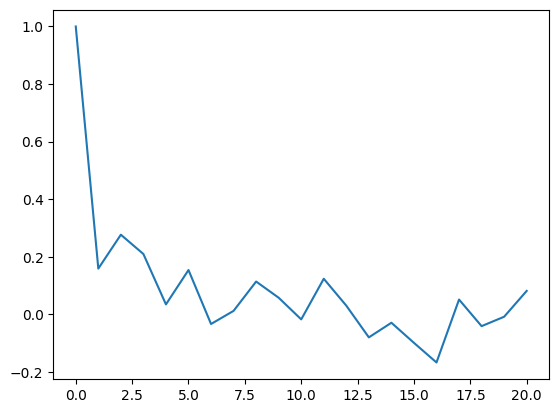

In [26]:
from statsmodels.tsa.stattools import acf

acf_data = acf(cancelled_time_series)
pyplot.plot(acf_data)
pyplot.show()

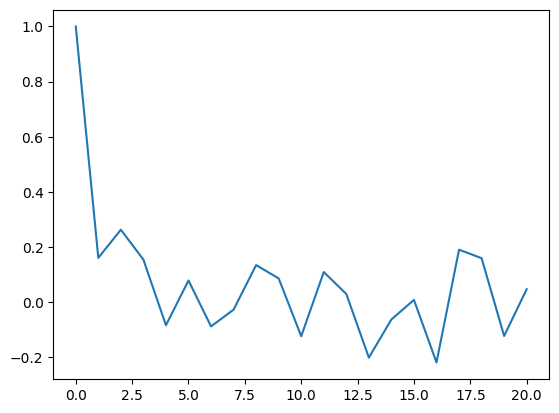

In [27]:
from statsmodels.tsa.stattools import pacf

pacf_data = pacf(cancelled_time_series)
pyplot.plot(pacf_data)
pyplot.show()
